<a href="https://colab.research.google.com/github/eghrthrjdtsed/-------------------------/blob/master/yolo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучение нейросети __YOLOv8__ на dataset, который был взят из интернета и размечен в __CVAT__, далее был выгружен файлом COCO1. После был преобразован из COCO to YOLO для дальнейшей работы с моделью.

Сегментация экземпляров

<img alt="Примеры сегментации экземпляров" src="https://user-images.githubusercontent.com/26833433/243418644-7df320b8-098d-47f1-85c5-26604d761286.png" width="1024">

Сегментация объектов идет на шаг дальше, чем обнаружение объектов, и включает в себя идентификацию отдельных объектов на изображении и их сегментацию от остальной части изображения.</br>

Выход модели сегментации экземпляров - это набор масок или контуров, очерчивающих каждый объект на изображении, а также метки классов и баллы доверия для каждого объекта. Сегментация экземпляров полезна, когда тебе нужно знать не только местоположение объектов на изображении, но и их точную форму.

Загружаем YOLO_dataset и разархивируем его

In [2]:
import zipfile

# let's look at the contents of the archive
data_r = zipfile.ZipFile('/content/Введение в нейронные сети.zip', 'r')


# extract the contents
data_r.extractall()

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [4]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)


# Train the model
results = model.train(data='/content/YOLO_dataset/data.yaml', epochs=100, imgsz=640, batch=8)

100%|██████████| 6.73M/6.73M [00:00<00:00, 230MB/s]


Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/YOLO_dataset/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning /content/YOLO_dataset/train/labels.cache... 72 images, 5 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/YOLO_dataset/validation/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]

Plotting labels to runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.023      2.037       3.54      1.083         50        640: 100%|██████████| 9/9 [01:25<00:00,  9.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

                   all          9         38    0.00865      0.687      0.204      0.151    0.00907       0.74      0.229      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.9677       1.88      3.168      1.027         47        640: 100%|██████████| 9/9 [01:20<00:00,  8.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all          9         38     0.0107      0.815      0.275      0.204     0.0104      0.802      0.264      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.9152       1.75      2.496      1.037         49        640: 100%|██████████| 9/9 [01:19<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all          9         38     0.0098      0.673      0.297      0.239     0.0101      0.777      0.312      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.007      1.716       2.04      1.061         49        640: 100%|██████████| 9/9 [01:18<00:00,  8.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all          9         38       0.87     0.0544      0.297      0.209       0.87     0.0544      0.289        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.9793       1.61      1.856      1.064         81        640: 100%|██████████| 9/9 [01:18<00:00,  8.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]

                   all          9         38      0.701      0.255      0.384      0.254        0.5      0.257      0.385      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G          1      1.655       1.82      1.092         43        640: 100%|██████████| 9/9 [01:18<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]

                   all          9         38      0.751      0.138        0.3      0.184      0.751      0.138      0.339      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.9557      1.655      1.808      1.066         52        640: 100%|██████████| 9/9 [01:19<00:00,  8.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all          9         38      0.814     0.0693      0.252      0.157      0.737      0.056      0.266      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.001      1.732      1.762       1.06         44        640: 100%|██████████| 9/9 [01:20<00:00,  8.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all          9         38      0.682      0.186      0.293      0.222      0.682      0.186      0.303      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.9428      1.593      1.577      1.056         74        640: 100%|██████████| 9/9 [01:20<00:00,  8.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

                   all          9         38      0.636      0.304      0.352      0.247      0.557      0.293      0.344       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.031      1.697      1.612       1.09         74        640: 100%|██████████| 9/9 [01:18<00:00,  8.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all          9         38      0.682      0.405      0.434      0.288      0.687      0.369      0.401       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.048      1.689      1.691      1.077         65        640: 100%|██████████| 9/9 [01:20<00:00,  8.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all          9         38      0.542      0.295      0.398      0.258      0.542      0.295      0.395      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.041      1.704      1.618      1.061         85        640: 100%|██████████| 9/9 [01:19<00:00,  8.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]

                   all          9         38      0.488       0.29      0.375      0.243      0.488       0.29      0.375      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.9391       1.52      1.559       1.07         38        640: 100%|██████████| 9/9 [01:17<00:00,  8.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all          9         38      0.519      0.405      0.417      0.264      0.519      0.405       0.42      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.065      1.765      1.631      1.087         42        640: 100%|██████████| 9/9 [01:20<00:00,  8.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all          9         38       0.56      0.378      0.441      0.278      0.571      0.354      0.424      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.9997       1.67       1.53      1.062         73        640: 100%|██████████| 9/9 [01:19<00:00,  8.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]

                   all          9         38      0.603      0.383      0.447      0.288      0.605      0.379      0.433      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.9603       1.46      1.463      1.084         37        640: 100%|██████████| 9/9 [01:19<00:00,  8.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

                   all          9         38      0.728      0.327      0.453      0.271      0.728      0.327      0.441      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.008      1.568      1.429      1.044         54        640: 100%|██████████| 9/9 [01:22<00:00,  9.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]

                   all          9         38      0.507      0.403      0.441      0.256      0.667      0.306      0.396      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.9342      1.504      1.452      1.047         39        640: 100%|██████████| 9/9 [01:19<00:00,  8.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

                   all          9         38      0.237      0.385      0.353      0.195      0.218      0.352      0.326      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.043      1.905      1.624      1.122         47        640: 100%|██████████| 9/9 [01:18<00:00,  8.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.55s/it]

                   all          9         38       0.24      0.453      0.422      0.235      0.314      0.373      0.411       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.9904      1.717      1.485      1.061         77        640: 100%|██████████| 9/9 [01:18<00:00,  8.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all          9         38      0.297       0.43      0.413      0.231       0.35      0.358      0.386      0.202



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.8886      1.532      1.544      1.059         75        640: 100%|██████████| 9/9 [01:17<00:00,  8.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all          9         38      0.368      0.529      0.496      0.288      0.345      0.508      0.463      0.262



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.9595      1.624      1.441      1.065         53        640: 100%|██████████| 9/9 [01:18<00:00,  8.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all          9         38      0.727      0.378      0.529      0.292      0.727      0.378      0.489      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.9938      1.641      1.434      1.093         67        640: 100%|██████████| 9/9 [01:18<00:00,  8.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]

                   all          9         38      0.519      0.443      0.491      0.261      0.529      0.452      0.491      0.272



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.9187      1.558      1.343      1.065         58        640: 100%|██████████| 9/9 [01:20<00:00,  8.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]

                   all          9         38      0.325      0.582      0.516      0.297      0.325      0.591      0.534      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.9218      1.561      1.309      1.042        103        640: 100%|██████████| 9/9 [01:19<00:00,  8.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]

                   all          9         38      0.398       0.67       0.54      0.322      0.378      0.524      0.508      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.9257      1.513      1.286      1.031         50        640: 100%|██████████| 9/9 [01:20<00:00,  8.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all          9         38      0.322      0.591      0.513      0.292      0.294      0.509      0.448      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.9218      1.543      1.482      1.046         55        640: 100%|██████████| 9/9 [01:18<00:00,  8.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all          9         38      0.621      0.368      0.466      0.303      0.588      0.368      0.427      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G          1      1.682      1.382      1.075         60        640: 100%|██████████| 9/9 [01:19<00:00,  8.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.00s/it]

                   all          9         38      0.382      0.474      0.474       0.28      0.382      0.474      0.473      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.9529      1.599      1.448      1.066         45        640: 100%|██████████| 9/9 [01:17<00:00,  8.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

                   all          9         38      0.492      0.445      0.474      0.284      0.526       0.47      0.497        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.9063      1.609      1.351       1.04         58        640: 100%|██████████| 9/9 [01:18<00:00,  8.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]

                   all          9         38      0.488      0.617      0.541      0.324      0.483      0.607      0.529      0.323



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.9051      1.501      1.338      1.054         47        640: 100%|██████████| 9/9 [01:18<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all          9         38       0.49      0.539      0.526      0.316      0.488      0.542      0.522      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.9247      1.623      1.296      1.016         62        640: 100%|██████████| 9/9 [01:19<00:00,  8.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all          9         38      0.589      0.458      0.573       0.31      0.509      0.605      0.584      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.8883       1.51      1.246      1.026         52        640: 100%|██████████| 9/9 [01:19<00:00,  8.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

                   all          9         38      0.498      0.558      0.581      0.325       0.54      0.585       0.59      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      0.954      1.496      1.234      1.039         74        640: 100%|██████████| 9/9 [01:18<00:00,  8.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]

                   all          9         38      0.438      0.633      0.601      0.347      0.437      0.632      0.609      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.8839      1.463      1.323      1.044         34        640: 100%|██████████| 9/9 [01:16<00:00,  8.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

                   all          9         38      0.747      0.518      0.554      0.292      0.734      0.498      0.551      0.276



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G       0.94      1.524       1.38      1.091         29        640: 100%|██████████| 9/9 [01:17<00:00,  8.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]

                   all          9         38      0.744      0.387      0.474      0.286      0.744      0.387      0.484      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      0.907      1.462      1.368      1.018         63        640: 100%|██████████| 9/9 [01:18<00:00,  8.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all          9         38      0.672      0.392      0.431      0.279      0.672      0.392      0.442        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.8923      1.494       1.31      1.008         46        640: 100%|██████████| 9/9 [01:20<00:00,  8.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

                   all          9         38      0.683      0.379      0.432      0.285      0.683      0.379      0.444      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.9047      1.397      1.262       1.01         66        640: 100%|██████████| 9/9 [01:21<00:00,  9.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

                   all          9         38      0.644      0.412      0.472      0.307      0.585      0.434      0.478       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.8615      1.353      1.237      1.011         67        640: 100%|██████████| 9/9 [01:21<00:00,  9.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all          9         38      0.573      0.444      0.507      0.334      0.573      0.444      0.499      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.8416      1.327      1.243      1.021         26        640: 100%|██████████| 9/9 [01:19<00:00,  8.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]

                   all          9         38      0.605       0.51      0.528      0.344      0.595      0.495      0.517      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.8888      1.352      1.217      1.034         43        640: 100%|██████████| 9/9 [01:19<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]

                   all          9         38      0.787      0.455       0.61      0.411      0.796      0.468      0.609      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      0.911      1.467      1.323       1.04         39        640: 100%|██████████| 9/9 [01:19<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]

                   all          9         38      0.883      0.364      0.622      0.453      0.883      0.364      0.616      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.8624      1.359       1.16      1.009         64        640: 100%|██████████| 9/9 [01:18<00:00,  8.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]

                   all          9         38      0.727      0.404      0.605       0.44      0.727      0.404        0.6      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G       0.86      1.377      1.418      1.045         33        640: 100%|██████████| 9/9 [01:17<00:00,  8.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]

                   all          9         38      0.738      0.417      0.574      0.387      0.738      0.417      0.568      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.8567      1.419      1.241      1.017         53        640: 100%|██████████| 9/9 [01:18<00:00,  8.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all          9         38      0.798      0.482      0.599      0.394      0.798      0.482      0.596      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.8652      1.384      1.144      1.002         47        640: 100%|██████████| 9/9 [01:18<00:00,  8.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]

                   all          9         38      0.739      0.496      0.584      0.386      0.739      0.496      0.582      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.8431      1.391      1.205      1.016         62        640: 100%|██████████| 9/9 [01:17<00:00,  8.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all          9         38      0.469      0.499      0.544      0.352      0.469      0.499      0.546      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.8239      1.254      1.161     0.9879         39        640: 100%|██████████| 9/9 [01:18<00:00,  8.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]

                   all          9         38      0.606      0.398      0.528      0.348      0.606      0.398      0.522       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.8745      1.457       1.13      1.004         54        640: 100%|██████████| 9/9 [01:19<00:00,  8.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all          9         38       0.59      0.375      0.468      0.319       0.59      0.375      0.469      0.325



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.7662      1.256      1.118     0.9879         53        640: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.39s/it]

                   all          9         38      0.699      0.438      0.464      0.314      0.699      0.438      0.464      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.8347      1.256      1.098     0.9959         49        640: 100%|██████████| 9/9 [01:18<00:00,  8.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

                   all          9         38      0.738       0.41      0.446      0.304      0.683       0.43      0.453      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.7763      1.277      1.081     0.9901         45        640: 100%|██████████| 9/9 [01:15<00:00,  8.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

                   all          9         38      0.713       0.47      0.474      0.321      0.713       0.47      0.479      0.315



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.7885       1.27      1.046     0.9856         45        640: 100%|██████████| 9/9 [01:18<00:00,  8.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all          9         38      0.789      0.426      0.491       0.33      0.789      0.426      0.495      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.7371      1.161     0.9551     0.9508         50        640: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]

                   all          9         38      0.761      0.478       0.51       0.32      0.761      0.478      0.511       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.7773      1.218       1.05     0.9782         60        640: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all          9         38      0.751      0.412      0.511      0.337      0.802      0.461      0.519      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.7737      1.216     0.9686     0.9724         57        640: 100%|██████████| 9/9 [01:17<00:00,  8.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all          9         38      0.801      0.398      0.513      0.345      0.849      0.447      0.528      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.8154      1.322      1.084     0.9787         62        640: 100%|██████████| 9/9 [01:18<00:00,  8.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]

                   all          9         38      0.792      0.442       0.53      0.341      0.789      0.442      0.521      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.7767      1.246      1.101     0.9913         94        640: 100%|██████████| 9/9 [01:15<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]

                   all          9         38      0.727      0.455       0.54      0.354      0.727      0.455      0.534      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.7385      1.219      1.069     0.9617         48        640: 100%|██████████| 9/9 [01:15<00:00,  8.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]

                   all          9         38       0.71      0.505      0.547      0.355       0.71      0.505      0.542      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.7812      1.282      1.014     0.9574         84        640: 100%|██████████| 9/9 [01:17<00:00,  8.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.02s/it]

                   all          9         38      0.766       0.53      0.534      0.344      0.766       0.53      0.532      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      0.777      1.203      1.013     0.9544         60        640: 100%|██████████| 9/9 [01:15<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all          9         38      0.727      0.472      0.528      0.348      0.727      0.472      0.524      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.8022      1.286      1.063     0.9925         59        640: 100%|██████████| 9/9 [01:16<00:00,  8.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

                   all          9         38        0.7      0.472      0.524      0.368        0.7      0.472      0.523      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.7425      1.214      1.011     0.9517         76        640: 100%|██████████| 9/9 [01:17<00:00,  8.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.23s/it]

                   all          9         38      0.731      0.465      0.497      0.346      0.731      0.465      0.488      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.7159      1.096     0.9849     0.9634         63        640: 100%|██████████| 9/9 [01:17<00:00,  8.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all          9         38      0.692      0.462      0.488       0.34       0.67      0.488       0.49      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.7476      1.205      1.038      0.959         79        640: 100%|██████████| 9/9 [01:18<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all          9         38      0.766      0.389      0.495      0.344      0.678      0.474      0.506      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.7574      1.213     0.9813     0.9485         70        640: 100%|██████████| 9/9 [01:16<00:00,  8.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]

                   all          9         38      0.781      0.423      0.509      0.339      0.781      0.423       0.51      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.7343      1.115     0.9912     0.9577         44        640: 100%|██████████| 9/9 [01:16<00:00,  8.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.13s/it]

                   all          9         38      0.814      0.421      0.544      0.372      0.814      0.421      0.535      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      0.792      1.333      1.038     0.9429         45        640: 100%|██████████| 9/9 [01:18<00:00,  8.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]

                   all          9         38      0.842      0.392      0.569      0.404      0.842      0.392      0.558      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.7125      1.123      1.027     0.9629         76        640: 100%|██████████| 9/9 [01:16<00:00,  8.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]

                   all          9         38      0.841      0.418      0.579      0.396      0.841      0.418      0.569      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.6786      1.059     0.9596     0.9449         77        640: 100%|██████████| 9/9 [01:16<00:00,  8.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all          9         38      0.819      0.443      0.591       0.41      0.772      0.447      0.573      0.402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.7273      1.055     0.9697     0.9664         50        640: 100%|██████████| 9/9 [01:14<00:00,  8.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all          9         38      0.729      0.498        0.6      0.425      0.717      0.478      0.585      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.6747      1.141     0.9465     0.9544         56        640: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.89s/it]

                   all          9         38      0.838      0.413      0.595      0.405      0.838      0.413      0.585      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.6945      1.086      0.986       0.96         63        640: 100%|██████████| 9/9 [01:15<00:00,  8.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

                   all          9         38      0.753      0.528      0.613      0.425      0.736      0.514      0.599      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.7269      1.146     0.9824     0.9531         36        640: 100%|██████████| 9/9 [01:16<00:00,  8.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.37s/it]

                   all          9         38      0.652      0.534      0.574      0.394      0.636      0.522      0.565      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.7088      1.107      0.954     0.9516         67        640: 100%|██████████| 9/9 [01:17<00:00,  8.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]

                   all          9         38      0.673       0.52      0.566      0.398      0.667      0.532      0.569      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      0.691      1.039     0.9776     0.9657         68        640: 100%|██████████| 9/9 [01:17<00:00,  8.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all          9         38        0.7      0.524       0.55      0.375      0.679      0.513      0.557      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.6653      1.159     0.9264     0.9325         41        640: 100%|██████████| 9/9 [01:17<00:00,  8.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all          9         38      0.729      0.511      0.538      0.361      0.712       0.49      0.543      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.7102       1.12      1.022     0.9718         43        640: 100%|██████████| 9/9 [01:17<00:00,  8.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

                   all          9         38      0.697      0.484      0.537      0.362      0.694      0.495      0.536      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.6798      1.073     0.9246     0.9481         56        640: 100%|██████████| 9/9 [01:17<00:00,  8.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all          9         38      0.727      0.445      0.523      0.359      0.723      0.458      0.538       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.6486     0.9841     0.8962     0.9308         55        640: 100%|██████████| 9/9 [01:16<00:00,  8.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

                   all          9         38      0.788      0.397      0.527      0.356      0.761      0.404      0.558      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.6664      1.026     0.9194     0.9287         63        640: 100%|██████████| 9/9 [01:19<00:00,  8.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

                   all          9         38      0.756      0.404      0.522      0.346      0.734       0.39      0.535      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      0.626      1.041     0.9035     0.9315         51        640: 100%|██████████| 9/9 [01:18<00:00,  8.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all          9         38      0.734      0.412      0.505      0.352      0.734      0.412      0.534      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.6827      1.142     0.9031     0.9227         50        640: 100%|██████████| 9/9 [01:18<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]

                   all          9         38      0.741       0.43      0.517       0.37      0.741       0.43      0.537      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.6796      1.045     0.8654     0.9308         51        640: 100%|██████████| 9/9 [01:18<00:00,  8.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all          9         38      0.726      0.431       0.52      0.388      0.726      0.431      0.537       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.6556      1.054     0.8891      0.941         45        640: 100%|██████████| 9/9 [01:17<00:00,  8.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]

                   all          9         38      0.767      0.402      0.527      0.401      0.699      0.428      0.529      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.6848      1.155      0.908     0.9408         71        640: 100%|██████████| 9/9 [01:16<00:00,  8.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]

                   all          9         38      0.816      0.417      0.547      0.408      0.745      0.407      0.548      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.6503       1.11      0.851      0.929         98        640: 100%|██████████| 9/9 [01:17<00:00,  8.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

                   all          9         38      0.824       0.44      0.557      0.416      0.766      0.428      0.561      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.6501      1.042     0.8627     0.9332         50        640: 100%|██████████| 9/9 [01:17<00:00,  8.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]

                   all          9         38      0.825       0.44      0.558      0.415       0.79      0.427       0.59      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.6205     0.9843     0.8157     0.9282         66        640: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]

                   all          9         38      0.813      0.433       0.56      0.407      0.778      0.421      0.592      0.421


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.6627      1.129      1.098     0.9422         24        640: 100%|██████████| 9/9 [01:18<00:00,  8.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

                   all          9         38      0.799      0.422      0.553      0.395      0.771      0.409      0.546      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.6649      1.079      1.103     0.9366         27        640: 100%|██████████| 9/9 [01:15<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.90s/it]

                   all          9         38        0.8      0.423       0.55      0.385      0.678      0.455      0.546      0.393



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.6481      1.115      1.078     0.9266         18        640: 100%|██████████| 9/9 [01:14<00:00,  8.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all          9         38       0.77      0.422      0.544       0.38      0.738      0.409       0.54       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.6474      1.057     0.9715     0.9332         32        640: 100%|██████████| 9/9 [01:16<00:00,  8.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]

                   all          9         38      0.723      0.432      0.537       0.38      0.744      0.409      0.534      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.6198      1.094     0.9767      0.906         21        640: 100%|██████████| 9/9 [01:17<00:00,  8.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

                   all          9         38      0.721      0.432      0.534      0.383      0.746      0.408      0.528      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.6308      1.023      1.009     0.9405         27        640: 100%|██████████| 9/9 [01:15<00:00,  8.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all          9         38      0.802      0.392      0.524      0.372      0.756        0.4      0.512      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.6387      1.006     0.9979     0.9156         20        640: 100%|██████████| 9/9 [01:16<00:00,  8.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]

                   all          9         38      0.797       0.39      0.518      0.366      0.772      0.399      0.507      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.5807      0.931     0.9572     0.8843         29        640: 100%|██████████| 9/9 [01:15<00:00,  8.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.20s/it]

                   all          9         38      0.786       0.39      0.525      0.375      0.786       0.39      0.518      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.6078     0.9799     0.9666     0.8916         19        640: 100%|██████████| 9/9 [01:15<00:00,  8.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.18s/it]

                   all          9         38      0.801      0.381      0.523      0.377      0.801      0.381      0.517      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.5839     0.9735     0.9464     0.9032         25        640: 100%|██████████| 9/9 [01:15<00:00,  8.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all          9         38      0.812      0.377      0.526       0.38      0.812      0.377      0.517      0.385



100 epochs completed in 2.282 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3259039 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


                   all          9         38      0.883      0.364      0.622       0.45      0.883      0.364      0.616      0.441
                Person          9         15      0.769        0.2      0.418      0.266      0.769        0.2      0.388      0.224
                   Car          9          8      0.985      0.625        0.9      0.622      0.985      0.625        0.9      0.719
             Motorbike          9          4          1      0.746      0.807       0.67          1      0.746      0.807      0.602
                   Bus          9          3          1          0      0.553       0.41          1          0      0.553      0.393
                 Truck          9          8      0.663       0.25       0.43      0.282      0.663       0.25      0.431      0.267
Speed: 1.9ms preprocess, 210.7ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/segment/train


In [9]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [123]:
model = YOLO('/content/runs/segment/train/weights/best.pt')

In [124]:
img = cv2.imread('/content/data_images/80.jpg')

In [133]:
results = model(img, imgsz=640, iou=0.2, conf=0.4)


0: 384x640 1 Person, 1 Car, 367.6ms
Speed: 7.1ms preprocess, 367.6ms inference, 15.9ms postprocess per image at shape (1, 3, 384, 640)


Посмотрим boxes  в долях от изображения

In [134]:
results[0].boxes.xywhn

tensor([[0.4880, 0.6235, 0.1262, 0.5879],
        [0.8371, 0.6889, 0.3257, 0.6117]])

Посмотрим размерность

In [135]:
results[0].boxes.xywhn.shape

torch.Size([2, 4])

Получили одно предсказание и четверка это размерность

Посмотрим на классы обектов на которых училась нейросеть

In [136]:
results[0].names

{0: 'Person', 1: 'Car', 2: 'Motorbike', 3: 'Bus', 4: 'Truck'}

Boxes Объект можно использовать для индексации, манипуляций и преобразования ограничительных рамок в различные форматы.

In [137]:
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 1.])
conf: tensor([0.6071, 0.4691])
data: tensor([[127.4607,  55.3640, 165.3111, 154.1268,   0.6071,   0.0000],
        [202.2852,  64.3509, 300.0000, 167.1214,   0.4691,   1.0000]])
id: None
is_track: False
orig_shape: (168, 300)
shape: torch.Size([2, 6])
xywh: tensor([[146.3859, 104.7454,  37.8504,  98.7629],
        [251.1426, 115.7362,  97.7148, 102.7705]])
xywhn: tensor([[0.4880, 0.6235, 0.1262, 0.5879],
        [0.8371, 0.6889, 0.3257, 0.6117]])
xyxy: tensor([[127.4607,  55.3640, 165.3111, 154.1268],
        [202.2852,  64.3509, 300.0000, 167.1214]])
xyxyn: tensor([[0.4249, 0.3295, 0.5510, 0.9174],
        [0.6743, 0.3830, 1.0000, 0.9948]])


Masks Объект можно использовать для индексации, манипулирования и преобразования масок в сегменты.

In [138]:
# View results
for r in results:
    print(r.masks)  # print the Masks object containing the detected instance masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
orig_shape: (168, 300)
shape: torch.Size([2, 384, 640])
xy: [array([[     143.44,      55.875],
       [     142.97,      56.344],
       [      142.5,      56.344],
       [      142.5,      59.156],
       [     142.03,      59.625],
       [     142.03,      63.844],
       [     141.09,      64.781],
       [     141.09,       65.25],
       [     140.62,      65.719],
       [     140.62,      66.187],
 

Keypoints Объект можно использовать для индексации, манипулирования и нормализации координат.

In [139]:
# View results
for r in results:
    print(r.keypoints)  # print the Keypoints object containing the detected keypoints

None


Probs объект можно использовать для индексации, получения top1 и top5 Индексы и баллы классификации.

In [140]:
# View results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities

None


In [141]:
from PIL import Image

Построение результатов
The plot() метод в Results Объекты облегчают визуализацию предсказаний, накладывая обнаруженные объекты (такие как ограничительные рамки, маски, ключевые точки и вероятности) на исходное изображение. Этот метод возвращает аннотированное изображение в виде массива NumPy, что позволяет легко отобразить его или сохранить.

In [142]:
# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f'results{i}.jpg')

Посмотрим сигментационную карту

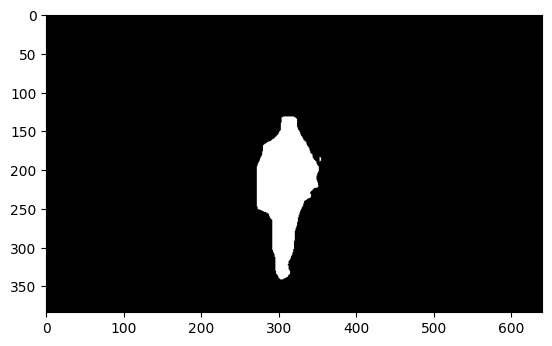

In [143]:
plt.imshow(results[0].masks.data[0].cpu().numpy(), 'gray')

In [144]:
# Получение классов и имен классов
classes = results[0].boxes.cls.cpu().numpy()
class_names = results[0].names

In [145]:
# Получение бинарных масок и их количество
masks = results[0].masks.data  # Формат: [число масок, высота, ширина]
num_masks = masks.shape[0]

In [146]:
# Определение случайных цветов и прозрачности для каждой маски
colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]  # Случайные цвета

In [147]:
# Создание изображения для отображения масок
mask_overlay = np.zeros_like(img)

In [148]:
labeled_image = img.copy()

In [149]:
# Добавление подписей к маскам
for i in range(num_masks):
    color = colors[i]  # Случайный цвет
    mask = masks[i].cpu()

    # Изменение размера маски до размеров исходного изображения с использованием метода ближайших соседей
    mask_resized = cv2.resize(np.array(mask), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Получение класса для текущей маски
    class_index = int(classes[i])
    class_name = class_names[class_index]

    # Добавление подписи к маске
    mask_contours, _ = cv2.findContours(mask_resized.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(labeled_image, mask_contours, -1, color, 5)
    cv2.putText(labeled_image, class_name, (int(mask_contours[0][:, 0, 0].mean()), int(mask_contours[0][:, 0, 1].mean())),
                cv2.FONT_HERSHEY_SIMPLEX, 4, color, 5)

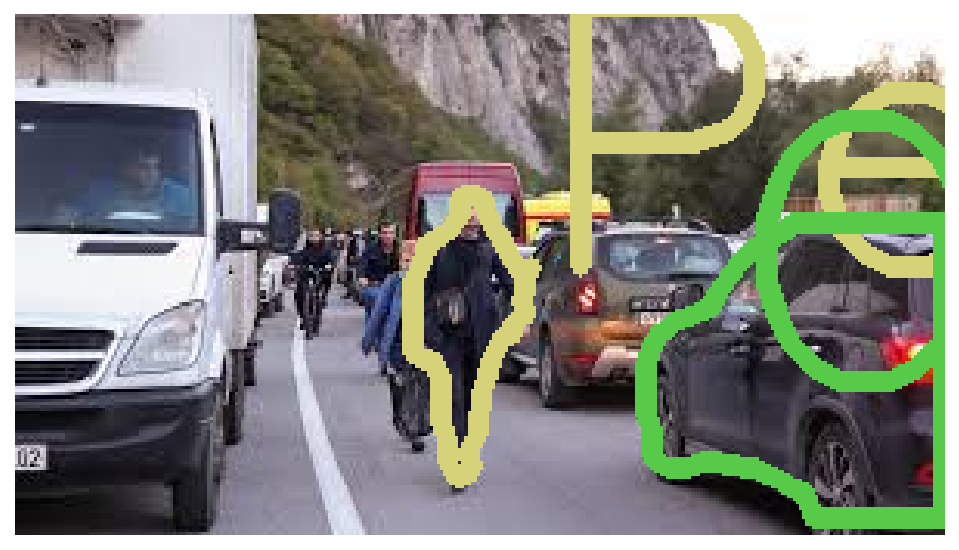

In [150]:
# Отобразите итоговое изображение с наложенными масками и подписями
plt.figure(figsize=(8, 8), dpi=150)
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB)
plt.imshow(labeled_image)
plt.axis('off')
plt.show()

In [118]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [151]:
image = cv2.imread('/content/data_images/0.jpg')

In [152]:
def interactive_plot(alpha, iou, conf, imgsz):
    np.random.seed(42)
    # Инференс с использованием модели YOLOv5
    results = model(image, imgsz=imgsz, iou=iou, conf=conf, verbose=False);

   # Получение бинарных масок и их количество
    masks = results[0].masks.data  # Формат: [число масок, высота, ширина]
    num_masks = masks.shape[0]

    # Определение случайных цветов и прозрачности для каждой маски
    colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]  # Случайные цвета

    # Создание изображения для отображения масок
    mask_overlay = np.zeros_like(image)

    # Наложение масок на изображение
    for i in range(num_masks):
        color = colors[i]  # Случайный цвет
        mask = masks[i].cpu()

        # Изменение размера маски до размеров исходного изображения с использованием метода ближайших соседей
        mask_resized = cv2.resize(np.array(mask), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        #print(mask.shape, img.shape, mask_resized.shape)

        # Создание маски с цветом и прозрачностью
        color_mask = np.zeros_like(image)
        color_mask[mask_resized > 0] = color
        mask_overlay = cv2.addWeighted(mask_overlay, 1, color_mask, alpha, 0)

    # Объединение исходного изображения и масок
    result_image = cv2.addWeighted(image, 1, mask_overlay, 1, 0)

    # Отобразите итоговое изображение с наложенными масками
    plt.figure(figsize=(8, 8), dpi=150)
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

In [153]:
# Создайте виджеты для изменения параметров
alpha_slider = widgets.FloatSlider(value=0.20, min=0.0, max=1.0, step=0.05, description='Alpha')
iou_slider = widgets.FloatSlider(value=0.65, min=0.0, max=1.0, step=0.05, description='IOU')
conf_slider = widgets.FloatSlider(value=0.15, min=0.0, max=1.0, step=0.05, description='Confidence')
imgsz_slider = widgets.IntSlider(value=608, min=32, max=2000, step=32, description='imgsz')


In [154]:
# Используйте interact для связи виджетов с функцией
interact(interactive_plot, alpha=alpha_slider, iou=iou_slider, conf=conf_slider, imgsz=imgsz_slider);


interactive(children=(FloatSlider(value=0.2, description='Alpha', max=1.0, step=0.05), FloatSlider(value=0.65,…

In [94]:
def process_and_save_video_yolo_demonstration(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.mp4"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        # Read a frame from the input video
        success, frame = cap.read()

        if success:
            # Run YOLOv8 tracking on the frame, persisting tracks between frames
            results = model.track(frame, persist=True, iou=0.65, conf=0.70,
                                  tracker="botsort.yaml", imgsz=640, classes=0, verbose=False)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            if save_video:
                # Write the frame to the output video
                out.write(annotated_frame)

            if show_video:
                annotated_frame = cv2.resize(annotated_frame, (annotated_frame.shape[1]//2, annotated_frame.shape[0]//2))
                # Display the annotated frame
                cv2.imshow("YOLOv8 Tracking", annotated_frame)

            # Check for the 'q' key to exit
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        else:
            break

    # Release the input video capture and output video writerй
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

In [ ]:
# Example usage:
model = YOLO('/content/runs/segment/train/weights/best.pt')
process_and_save_video_yolo_demonstration(model, input_video_path="track_video.mp4",
                                          show_video=True, save_video=False,
                                          output_video_path="output_video.mp4")

In [95]:
import cv2
from ultralytics import YOLO
import random
import numpy as np
import sys, os

In [96]:
def process_video_with_tracking(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.mp4"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps/2, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        results = model.track(frame, iou=0.6, conf=0.75, persist=True, imgsz=640, verbose=False, tracker="botsort.yaml")

        if results[0].boxes.id != None: # this will ensure that id is not None -> exist tracks
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            ids = results[0].boxes.id.cpu().numpy().astype(int)

            for box, id in zip(boxes, ids):
                # Generate a random color for each object based on its ID
                random.seed(int(id))
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

                cv2.rectangle(frame, (box[0], box[1]), (box[2], box[3],), color, 4)
                cv2.putText(
                    frame,
                    f"Id {id}",
                    (box[0], box[1]),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.5,
                    (0, 255, 255),
                    2,
                )

        if save_video:
            out.write(frame)

        if show_video:
            frame = cv2.resize(frame, (frame.shape[1]//2, frame.shape[0]//2))
            cv2.imshow("frame", frame)

        if cv2.waitKey(int(1000/fps)) & 0xFF == ord("q"):
            break

    # Release the input video capture and output video writer
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()


In [ ]:
# Example usage:
model = YOLO('/content/runs/segment/train/weights/best.pt')
process_video_with_tracking(model, input_video_path="track_video.mp4",
                                          show_video=True, save_video=False,
                                          output_video_path="result_videos/output_video.mp4")


In [ ]:
import cv2
from ultralytics import YOLO
import random
import numpy as np
import sys, os, cv2

In [ ]:
def process_video_with_tracking_segment(model, input_video_path, show_video=True, save_video=False, output_video_path="output_video.avi"):
    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        raise Exception("Error: Could not open video file.")

    # Get input video frame rate and dimensions
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define the output video writer
    if save_video:
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = model.track(frame, iou=0.5, conf=0.70,
                              persist=True, imgsz=640, verbose=False, tracker="botsort.yaml")

        if results[0].boxes.id != None: # this will ensure that id is not None -> exist tracks
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            ids = results[0].boxes.id.cpu().numpy().astype(int)
            masks = results[0].masks.data.cpu().numpy().astype(int)

            classes = results[0].boxes.cls.cpu().numpy()
            class_names = results[0].names

            for box, id, mask, class_of_data in zip(boxes, ids, masks, classes):
                # Generate a random color for each object based on its IDq
                random.seed(int(id))
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

                # Получение класса для текущей маски
                class_name = class_names[class_of_data]

                # Получение ширины и высоты текста
                text = f"ID {id} {class_name}"
                font = cv2.FONT_HERSHEY_SIMPLEX
                fontScale = 1.2
                fontColor = (150, 0, 50)
                thickness = 3
                textSize = cv2.getTextSize(text, font, fontScale, thickness)[0]
                textWidth, textHeight = textSize[0], textSize[1]

                # Вычисление координат для центрирования текста
                centerX = (box[0]+box[2])//2 - textWidth // 2
                centerY = (box[1]+box[3])//2 + textHeight // 2

                color_mask = np.zeros_like(frame)
                mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_NEAREST)

                color_mask[mask > 0] = color

                alpha = 0.3 # прозрачность масок
                frame = cv2.addWeighted(frame, 1, color_mask, alpha, 0)

                # Добавление контуров к маске
                mask_contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                frame = cv2.drawContours(frame, mask_contours, -1, color, 5)

                # Отрисовка текста с учетом центрирования
                frame = cv2.putText(
                    frame,
                    text,
                    (centerX, centerY),
                    font,
                    fontScale,
                    fontColor,
                    thickness
                )

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        if save_video:
            out.write(frame)

        if show_video:
            frame = cv2.resize(frame, (frame.shape[1]//2, frame.shape[0]//2))
            cv2.imshow("frame", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Release the input video capture and output video writer
    cap.release()
    if save_video:
        out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()



In [ ]:
# Example usage:
model = YOLO('/content/runs/segment/train/weights/best.pt')
process_video_with_tracking_segment(model, "track_video.mp4", show_video=False, save_video=True, output_video_path="output_video_id.avi")



__Вывод__: В данной работе был реализован детектор объектов YOLO (You Only Look Once) для сегментации изображений. YOLOv8 -  В данной работе был использован предварительно обученный YOLO-модель, которая была обучена на не большом наборе данных.</br>

Для визуализации результатов работы модели были использованы бинарные маски и подписи к ним. Бинарные маски представляют собой изображения, где каждый пиксель имеет значение 0 или 1, что указывает на принадлежность пикселя к объекту или нет. Подписи к маскам были добавлены для удобства визуализации результатов работы модели.</br>

В результате работы была получена визуализация изображения с наложенными масками и подписями к ним. Это позволяет увидеть, какие объекты были обнаружены моделью, и какие классы объектов они принадлежат.</br>

Чтобы улучшить работу модели, можно предпринять следующие шаги:</br>

Улучшение качества обучающих данных: Модель обучается на данных, которые она видит во время обучения. Улучшение качества обучающих данных может повысить точность и производительность модели.</br>


Обучение модели на дополнительных классах объектов: В данной работе модель обучалась на стандартном наборе данных COCO. Обучение модели на дополнительных классах объектов может улучшить ее способность обнаруживать и сегментировать новые виды объектов.</br>

Обучение модели на изображениях с низким качеством: В некоторых случаях модель может неправильно обнаруживать и сегментировать объекты на изображениях с низким качеством. Обучение модели на таких изображениях может улучшить ее способность обнаруживать и сегментировать объекты на изображениях с низким качеством.</br>

Обучение модели на изображениях с большим количеством объектов: В некоторых случаях изображения могут содержать большое количество объектов. Обучение модели на таких изображениях может улучшить ее способность обнаруживать и сегментировать множество объектов.</br>

Обучение модели на изображениях с большими размерами: В данной работе модель обучалась на изображениях с размером 640x640 пикселей. Обучение модели на изображениях с большими размерами может улучшить ее способность обнаруживать и сегментировать объекты на изображениях с большими размерами.